In [70]:
#importing the necessary libraries for your project (upto now, not finished)
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#loading the training and test data 
train = pd.read_csv(r'C:\Users\ASUS\Desktop\DM_project\train.csv')
test = pd.read_csv(r'C:\Users\ASUS\Desktop\DM_project\test.csv')

# Explore the data using statistics and visualization techniques

In [72]:
#printing the shape of the training data (shape means a tuple that contains the number of rows and columns in a dataset)
train.shape

(614, 13)

In [73]:
#printing the shape of the testing data (shape means a tuple that contains the number of rows and columns in a dataset)
test.shape

(367, 12)

In [74]:
#printing the first five rows of the training Data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
#printing the first five rows of the test Data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [76]:
#printing the informations about the training Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [77]:
#printing the informations about the testing Data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [78]:
#printing the number of missing values in each column in training data.
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
#printing the number of unique values in each column of the training data. 
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [80]:
print(train['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


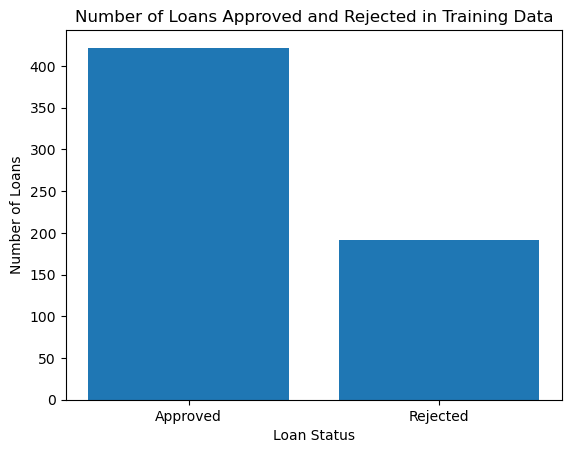

In [81]:
# Creating a bar chart to compare the number of loans approved and rejected
plt.bar(['Approved', 'Rejected'], train['Loan_Status'].value_counts())
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Approved and Rejected in Training Data')
plt.show()

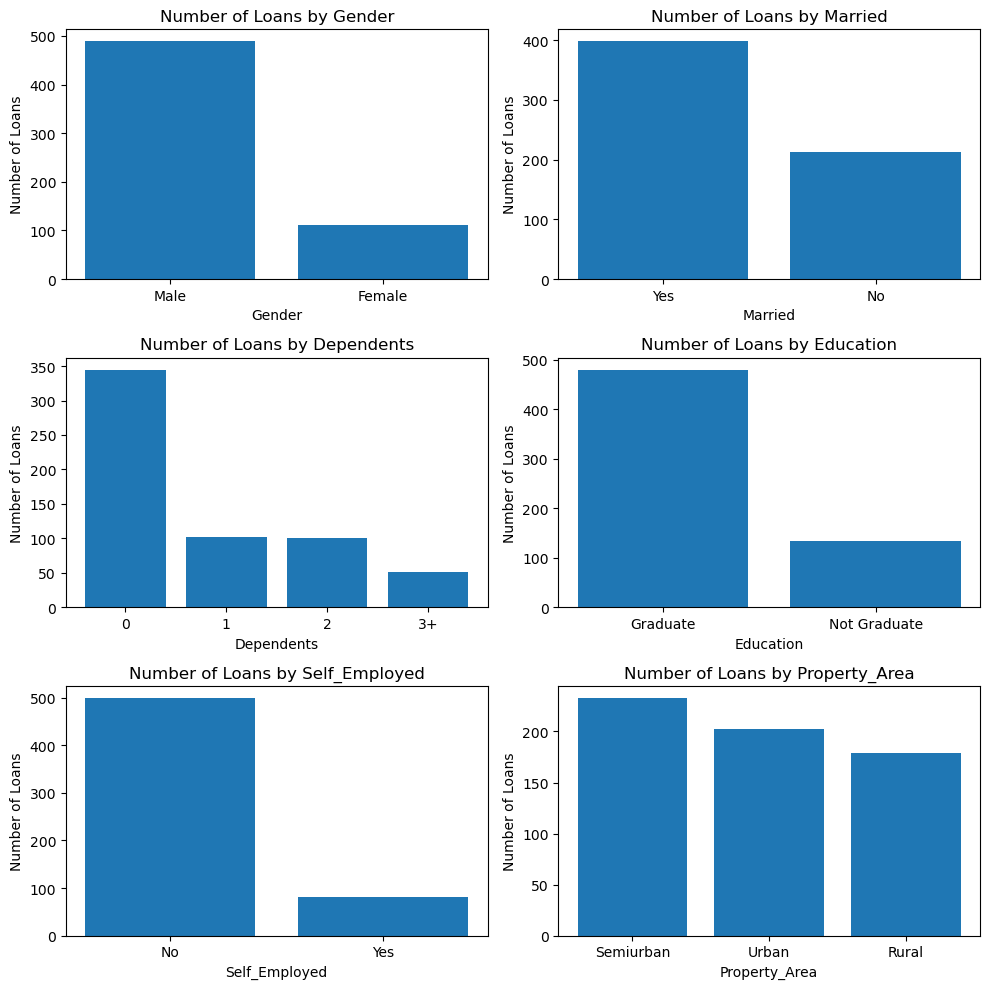

In [82]:
# Creating a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in range(3):
    for j in range(2):
        variable_index = i * 2 + j
        if variable_index < len(variables):
            variable = variables[variable_index]
            axs[i, j].bar(train[variable].value_counts().index, train[variable].value_counts().values)
            axs[i, j].set_xlabel(variable)
            axs[i, j].set_ylabel('Number of Loans')
            axs[i, j].set_title('Number of Loans by ' + variable)

fig.tight_layout()

plt.show()

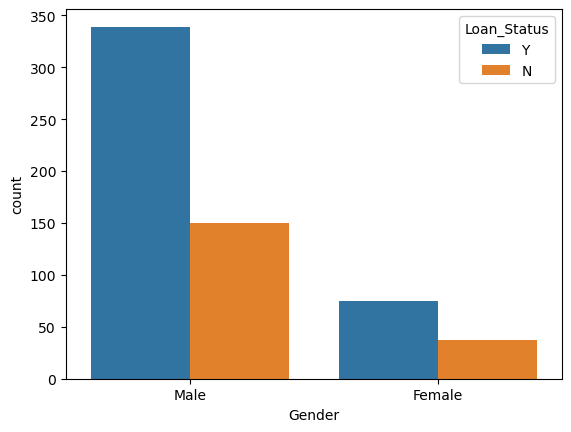

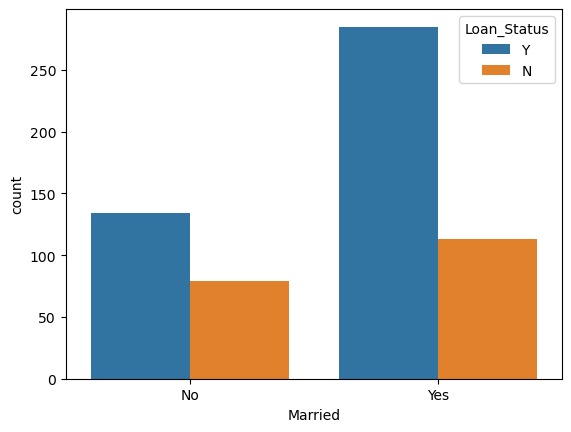

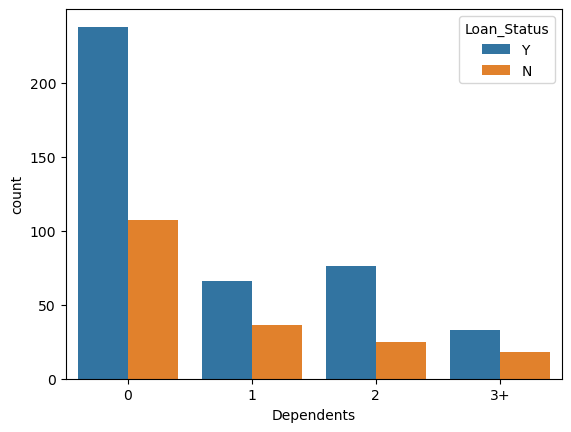

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Example with 'Married' and 'Loan_Status'
sns.countplot(x='Married', hue='Loan_Status', data=train)
plt.show()

# Example for 'Dependents'
sns.countplot(x='Dependents', hue='Loan_Status', data=train)
plt.show()


In [84]:
# Calculating the descriptive statistics for the training data
train_descriptive_stats = train.describe()
print(train_descriptive_stats)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


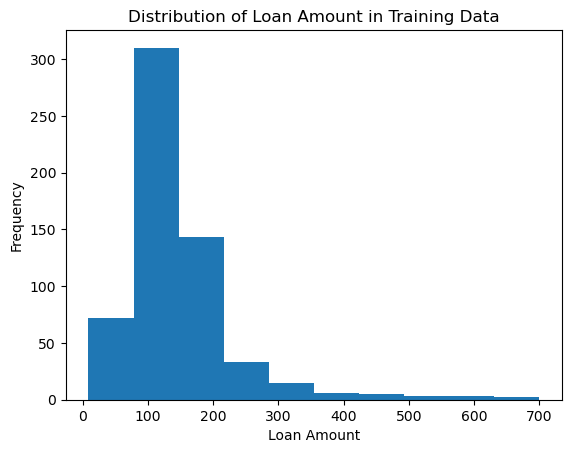

In [85]:
# Creating a histogram of the LoanAmount variable
plt.hist(train['LoanAmount'])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount in Training Data')
plt.show()

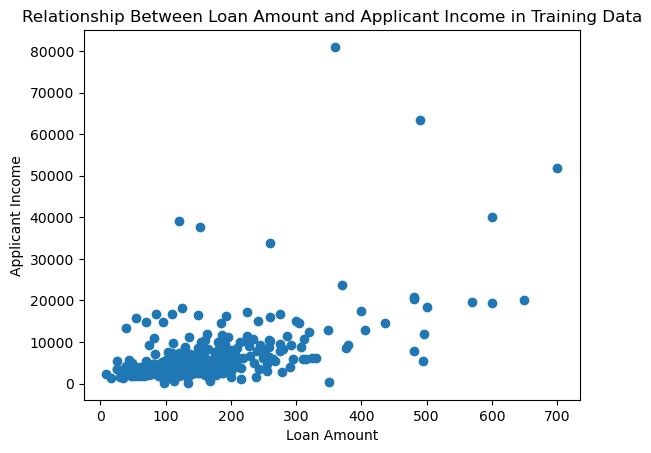

In [86]:
# Creating a scatter plot to show the relationship between the LoanAmount and ApplicantIncome variables
plt.scatter(train['LoanAmount'], train['ApplicantIncome'])
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Relationship Between Loan Amount and Applicant Income in Training Data')
plt.show()

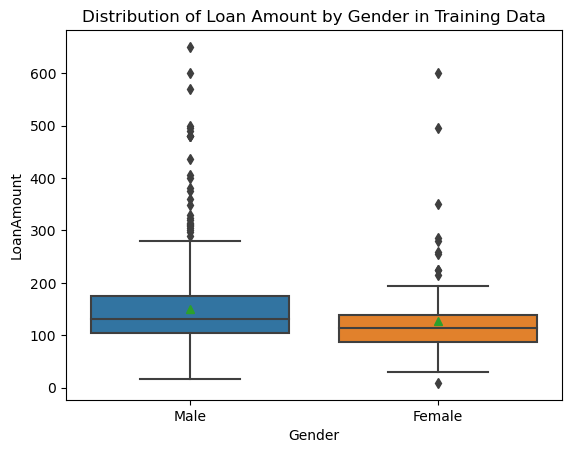

In [87]:
# Creating a box plot to compare the distributions of the LoanAmount variable by gender
sns.boxplot(
    x = 'Gender',
    y = 'LoanAmount',
    showmeans=True,
    data=train
)
plt.title('Distribution of Loan Amount by Gender in Training Data')
plt.show()

# convert Loan_Status attribute into numerical 

In [19]:
#converting Loan_Status column to a numeric variable.(1 = approved and 0 = not approved)
train['Loan_Status'][train['Loan_Status'] == 'Y'] = 1
train['Loan_Status'][train['Loan_Status'] == 'N'] = 0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\3511082153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Status'][train['Loan_Status'] == 'Y'] = 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\3511082153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Status'][train['Loan_Status'] == 'N'] = 0


# Dropping the duplicates if any

In [20]:
# Count the number of duplicate rows in the training dataset
num_duplicates = train[train.duplicated()].shape[0]

# Print the number of duplicates
print("Number of Duplicate Rows in Training Dataset:", num_duplicates)


Number of Duplicate Rows in Training Dataset: 0


In [21]:
# Count the number of duplicate rows in the training dataset
num_duplicates = test[test.duplicated()].shape[0]

# Print the number of duplicates
print("Number of Duplicate Rows in Testing Dataset:", num_duplicates)


Number of Duplicate Rows in Testing Dataset: 0


In [22]:
#to results the nonunique values
for column in train.columns:
    unique_values = train[column].unique()
    print(f"{column}: {unique_values}")


Loan_ID: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP00128

# handling outliers

<Axes: >

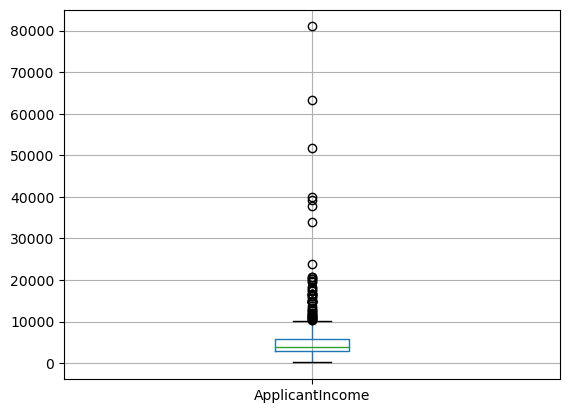

In [23]:
train.boxplot(column=['ApplicantIncome'])    


<Axes: >

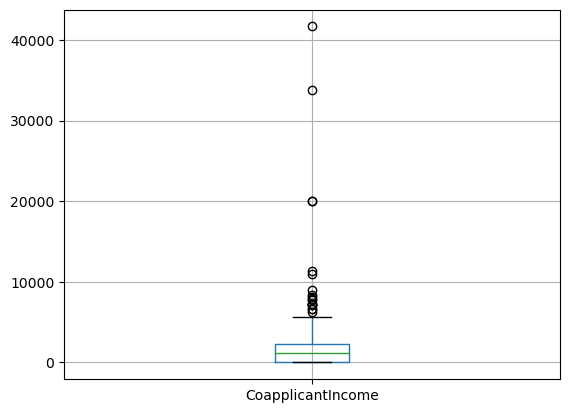

In [24]:
train.boxplot(column=['CoapplicantIncome'])         


<Axes: >

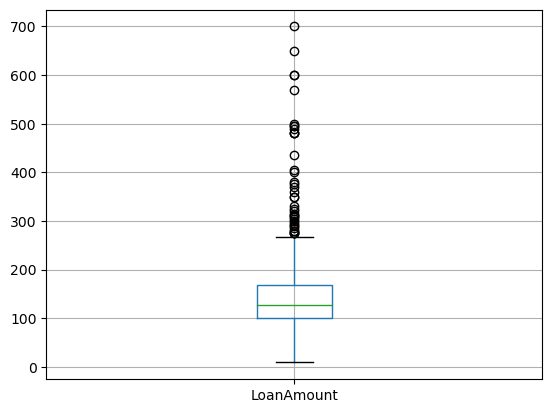

In [25]:
train.boxplot(column=['LoanAmount']) 

In [26]:
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['ApplicantIncome'] < (Q1 - 3 * IQR)) | (train['ApplicantIncome'] > (Q3 + 3 * IQR)))]
     



In [27]:
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['CoapplicantIncome'] < (Q1 - 3 * IQR)) | (train['CoapplicantIncome'] > (Q3 + 3 * IQR)))]
     



In [28]:
Q1 = train['LoanAmount'].quantile(0.25)
Q3 = train['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['LoanAmount'] < (Q1 - 3 * IQR)) | (train['LoanAmount'] > (Q3 + 3 * IQR)))]

<Axes: >

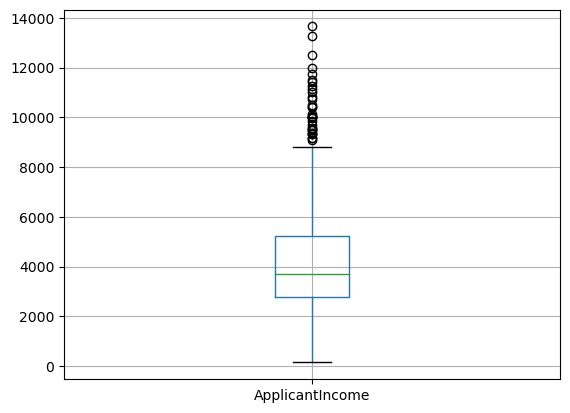

In [29]:
train.boxplot(column=['ApplicantIncome'])  

<Axes: >

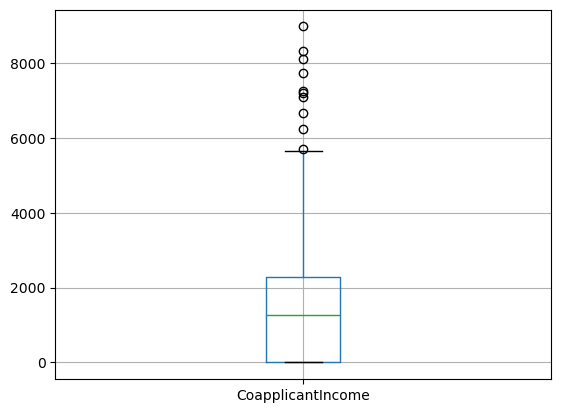

In [30]:
train.boxplot(column=['CoapplicantIncome'])

<Axes: >

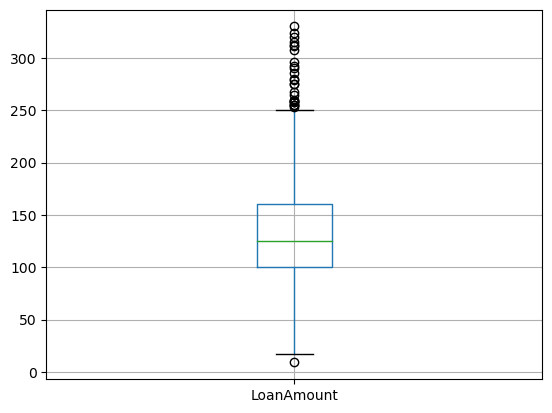

In [31]:
train.boxplot(column=['LoanAmount'])

# Handling missing values

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [33]:
#printing the number of unique values in each column of the training data. 
train.nunique()

Loan_ID              571
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      466
CoapplicantIncome    275
LoanAmount           181
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Converting categorical values to numerical values

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Education'] = label_encoder.fit_transform(train['Education'])
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])
train['Dependents'] = label_encoder.fit_transform(train['Dependents'])


In [35]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,132.854545,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# handling class imbalance

In [36]:
train['Loan_Status'].value_counts()


1    394
0    177
Name: Loan_Status, dtype: int64

In [37]:
train_majority = train[train.Loan_Status == 1]
train_minority = train[train.Loan_Status == 0]


In [38]:
from sklearn.utils import resample
train_minority_upsampled = resample(train_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=394,    # to match majority class
                                    random_state=123) # reproducible results


In [39]:
train = pd.concat([train_majority, train_minority_upsampled])


In [40]:
train['Loan_Status'].value_counts()


1    394
0    394
Name: Loan_Status, dtype: int64

# Feature engineering

In [41]:
#printing the number of missing values in each column in training data.
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
# Create a new feature 'Total_Income' by adding 'ApplicantIncome' and 'CoapplicantIncome'
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

print(train[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].head())


   ApplicantIncome  CoapplicantIncome  Total_Income
0             5849                0.0        5849.0
2             3000                0.0        3000.0
3             2583             2358.0        4941.0
4             6000                0.0        6000.0
5             5417             4196.0        9613.0


In [43]:
X = train.drop(['Loan_Status', 'Loan_ID'], axis=1)  # Remove 'Loan_Status' and 'Loan_ID' columns
Y = train['Loan_Status']


In [44]:
print(Y.value_counts())


1    394
0    394
Name: Loan_Status, dtype: int64


In [45]:
X_cat = X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',  'Total_Income'], axis=1)  # Categorical features
X_num = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income']]  # Numeric features


In [46]:
print("Shape of X_num:", X_num.shape)
print("Shape of X_cat:", X_cat.shape)
print("Shape of Y:", Y.shape)

Shape of X_num: (788, 4)
Shape of X_cat: (788, 8)
Shape of Y: (788,)


In [47]:
X_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income
0,5849,0.0,132.854545,5849.0
2,3000,0.0,66.000000,3000.0
3,2583,2358.0,120.000000,4941.0
4,6000,0.0,141.000000,6000.0
5,5417,4196.0,267.000000,9613.0


In [48]:
X_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,360.0,1.0,2
2,1,1,0,0,1,360.0,1.0,2
3,1,1,0,1,0,360.0,1.0,2
4,1,0,0,0,0,360.0,1.0,2
5,1,1,2,0,1,360.0,1.0,2


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\1958714540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

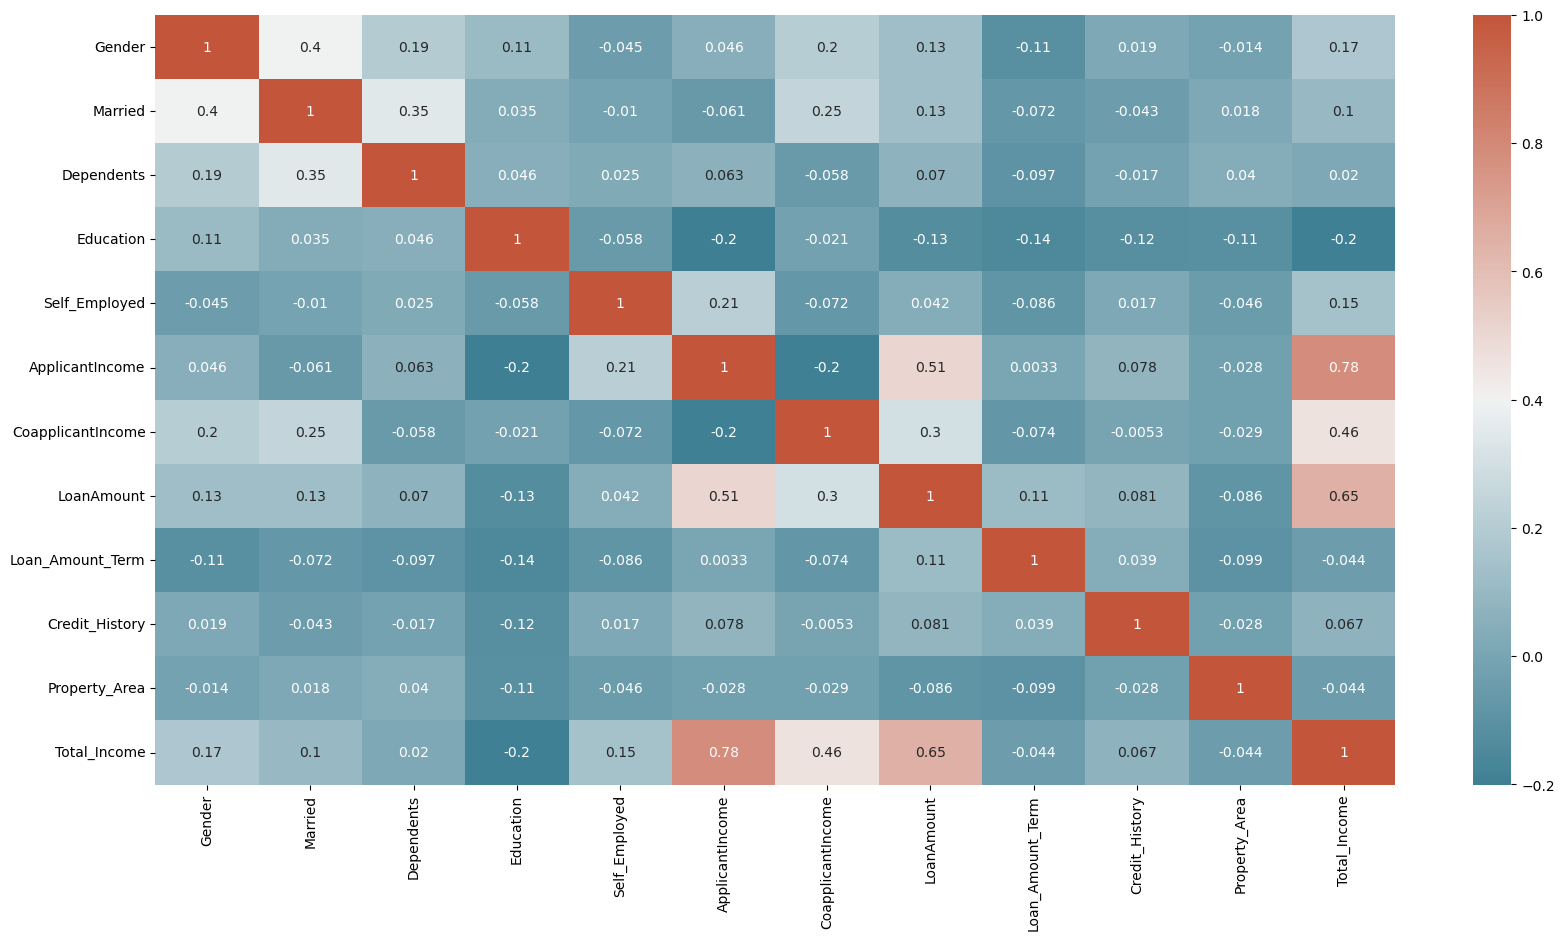

In [49]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\2326390973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

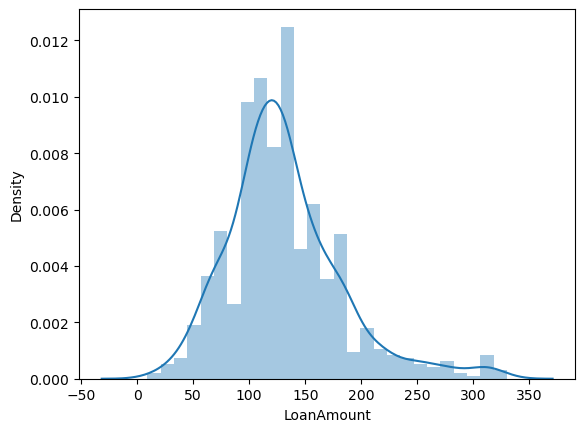

In [50]:
sns.distplot(X_num['LoanAmount'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\249691389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

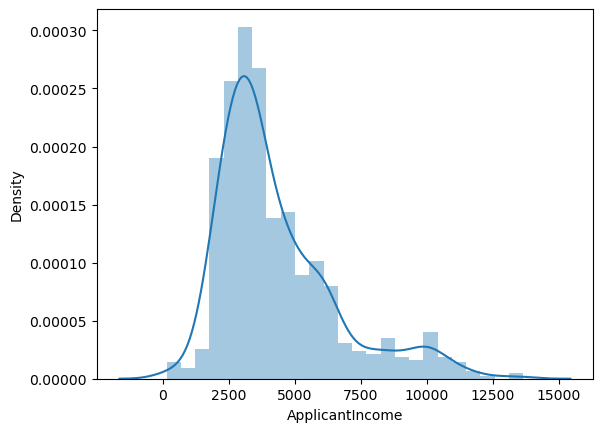

In [51]:
sns.distplot(X_num['ApplicantIncome'])

In [52]:
X_num['LoanAmount']


0      132.854545
2       66.000000
3      120.000000
4      141.000000
5      267.000000
          ...    
340    173.000000
396     71.000000
128    160.000000
66     126.000000
605    132.854545
Name: LoanAmount, Length: 788, dtype: float64

In [53]:
X_num = X_num[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income']].applymap(lambda x: np.log(x+1))

# Feature scalling 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5792\2326390973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

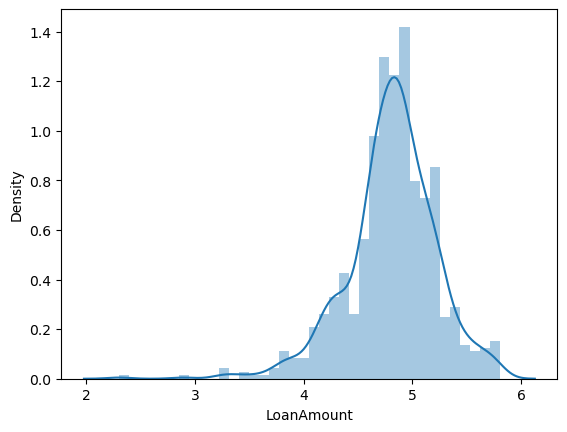

In [54]:
sns.distplot(X_num['LoanAmount'])

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

In [56]:
print(Y.dtypes)  # Check the data type of your target variable

print(Y.isnull().sum())  # Check the number of missing values in the target variable


object
0


In [57]:

Y = Y.astype(int)  # Convert target variable to integer type


# model selection, training, and initial evaluation

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.7341772151898734
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.61      0.71        83
           1       0.67      0.87      0.76        75

    accuracy                           0.73       158
   macro avg       0.75      0.74      0.73       158
weighted avg       0.76      0.73      0.73       158

Decision Tree Accuracy: 0.8670886075949367
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        83
           1       0.92      0.79      0.85        75

    accuracy                           0.87       158
   macro avg       0.88      0.86      0.87       158
weighted avg       0.87      0.87      0.87       158



In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluation
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8924050632911392
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        83
           1       0.87      0.91      0.89        75

    accuracy                           0.89       158
   macro avg       0.89      0.89      0.89       158
weighted avg       0.89      0.89      0.89       158



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the GridSearchCV to the data
grid_search.fit(X, Y)

# Retrieve the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best parameters obtained from GridSearchCV
best_params = grid_search.best_params_

# Create a new Random Forest Classifier with the best parameters
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'])

# Train the model on your training data
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Assess the accuracy of the tuned model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Tuned Random Forest Accuracy:", accuracy_best_rf)

# You can also print other evaluation metrics like classification report
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.907344997178102
Tuned Random Forest Accuracy: 0.879746835443038
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        83
           1       0.87      0.88      0.87        75

    accuracy                           0.88       158
   macro avg       0.88      0.88      0.88       158
weighted avg       0.88      0.88      0.88       158

